# **Optimization Project 1**

**Group 22**
1. Bhuvana Chandrika Kothapalli (bk2452)
2. Eeshana Hamed (eh28497)
3. Meenakshi Sundaram (ms88544)
4. Saiyam Shah (Sns3694)

### Loading the data

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from keras.datasets import mnist
from matplotlib import pyplot
from tensorflow.keras import layers, models
np.random.seed(42)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Layer, Input, Dense, Concatenate, Embedding, LayerNormalization, MultiHeadAttention, Add, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
!pip install tensorflow-addons
import tensorflow_addons as tfa
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from google.colab import files

In [12]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [13]:
#shape of data
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


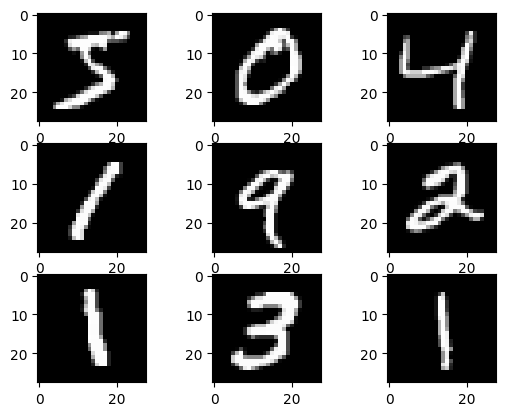

In [14]:
#plotting the data
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))

### Preparing Input Data

In [15]:
# reshape and normalize dataset to have a single channel
train_X = train_X.reshape(train_X.shape[0], 28, 28, 1).astype('float32') / 255.0
test_X = test_X.reshape(test_X.shape[0], 28, 28, 1).astype('float32') / 255.0
print(train_X.shape, test_X.shape)


(60000, 28, 28, 1) (10000, 28, 28, 1)


In [16]:
# Convert labels to one-hot encoding
train_y = keras.utils.to_categorical(train_y, 10)
test_y = keras.utils.to_categorical(test_y, 10)

In [17]:
# Split training data into training and validation sets
train_X, test_X, train_y, test_y = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

<font color='Red' size='+2'>CNN</font>

In [19]:
def define_model():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
    # Compile the model
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [20]:
model = define_model()

# Train the model
history = model.fit(train_X, train_y, epochs=30, batch_size=64, verbose=1, validation_data=(test_X, test_y))

Epoch 1/30
750/750 [==============================] - 12s 12ms/step - loss: 0.9672 - accuracy: 0.8806 - val_loss: 0.5362 - val_accuracy: 0.9746
Epoch 2/30
750/750 [==============================] - 8s 11ms/step - loss: 0.4807 - accuracy: 0.9676 - val_loss: 0.3435 - val_accuracy: 0.9828
Epoch 3/30
750/750 [==============================] - 8s 11ms/step - loss: 0.3262 - accuracy: 0.9758 - val_loss: 0.2461 - val_accuracy: 0.9862
Epoch 4/30
750/750 [==============================] - 8s 10ms/step - loss: 0.2573 - accuracy: 0.9785 - val_loss: 0.2101 - val_accuracy: 0.9892
Epoch 5/30
750/750 [==============================] - 8s 11ms/step - loss: 0.2283 - accuracy: 0.9814 - val_loss: 0.1898 - val_accuracy: 0.9882
Epoch 6/30
750/750 [==============================] - 8s 11ms/step - loss: 0.2157 - accuracy: 0.9820 - val_loss: 0.1885 - val_accuracy: 0.9886
Epoch 7/30
750/750 [==============================] - 8s 11ms/step - loss: 0.2075 - accuracy: 0.9836 - val_loss: 0.1977 - val_accuracy: 0.988

In [22]:

# Evaluate the model on training data
_, train_accuracy = model.evaluate(train_X, train_y, verbose=0)
print('Train Accuracy: %.2f' % (train_accuracy * 100))

# Evaluate the model on test data
_, test_accuracy = model.evaluate(test_X, test_y, verbose=0)
print('Test Accuracy: %.2f' % (test_accuracy * 100))

Train Accuracy: 99.78
Test Accuracy: 99.10


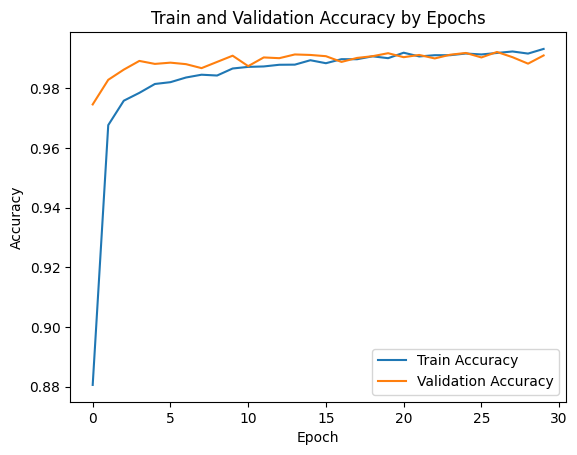

In [23]:
# Plotting train and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy by Epochs')
plt.legend()
plt.show()

## Evaluating the model by testing on 5 random images

1/1 [==============================] - 0s 332ms/step


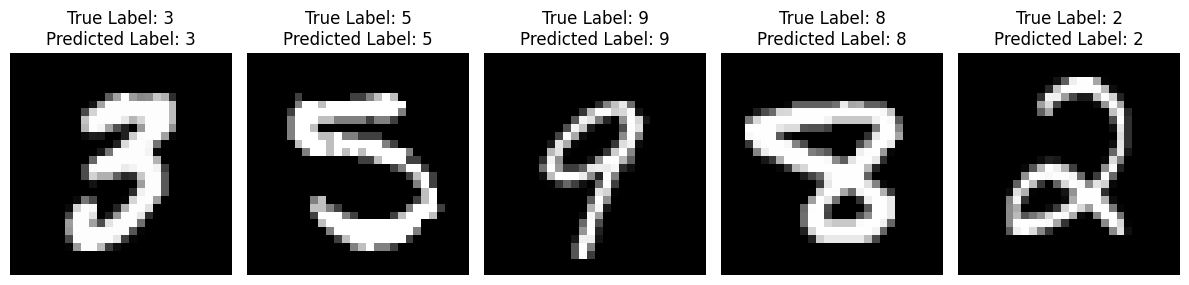

In [24]:
# Select random indices for testing
random_indices = np.random.choice(len(test_X), 5, replace=False)

# Get the random images and their labels
random_images = test_X[random_indices]
random_labels = test_y[random_indices]

# Get predictions for the random images
predictions = model.predict(random_images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the random images along with their true and predicted labels
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(random_images[i].reshape(28, 28), cmap='gray')
    true_label = np.argmax(random_labels[i])
    predicted_label = predicted_labels[i]
    plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()



# Misclassified Images

375/375 [==============================] - 1s 2ms/step


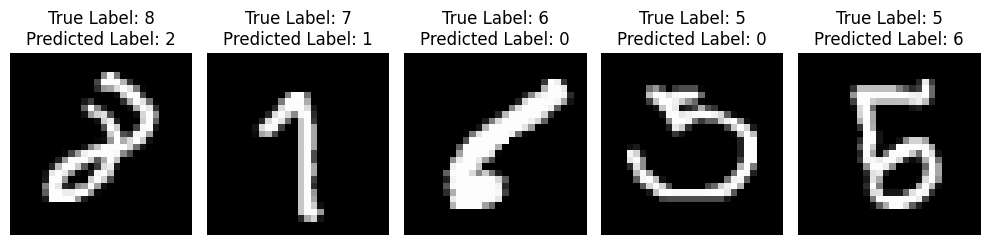

In [25]:
predictions = model.predict(test_X)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels to integer labels
true_labels = np.argmax(test_y, axis=1)

# Find misclassified indices
misclassified_indices = np.where(predicted_labels != true_labels)[0]

# Plot misclassified images in a grid
num_rows = 1  # Number of rows in the grid
num_cols = 5  # Number of columns in the grid
num_images_to_plot = num_rows * num_cols

plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_indices[:num_images_to_plot]):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(test_X[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {true_labels[idx]}\nPredicted Label: {predicted_labels[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

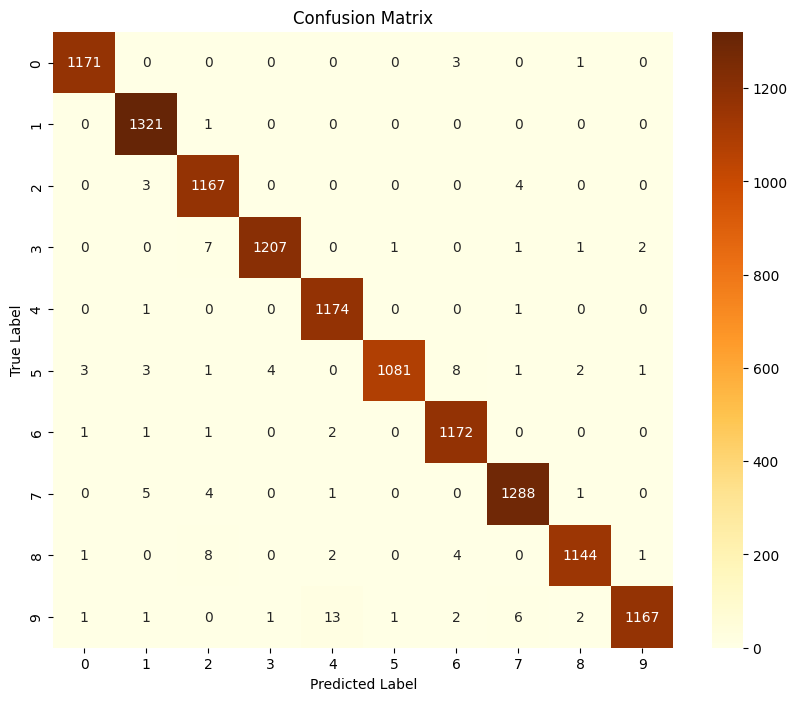

In [26]:
import seaborn as sns

# Convert one-hot encoded test_y to single labels
true_classes = np.argmax(test_y, axis=1)

# Obtain the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Saving the model

In [28]:
# Save the model as .h5 file
model.save("/content/drive/MyDrive/Colab Notebooks/Cnn_model.h5")
# Download the model file to your local machine
files.download("/content/drive/MyDrive/Colab Notebooks/Cnn_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Retraining Model on Training Data

In [29]:
# Load the saved model
loaded_mod = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Cnn_model.h5")

In [46]:
# Retrain the loaded model on the entire dataset
history2 = loaded_mod.fit(train_X, train_y, epochs=30, batch_size=64)

Epoch 1/30
750/750 [==============================] - 7s 10ms/step - loss: 0.1012 - accuracy: 0.9960
Epoch 2/30
750/750 [==============================] - 7s 10ms/step - loss: 0.0813 - accuracy: 0.9975
Epoch 3/30
750/750 [==============================] - 7s 10ms/step - loss: 0.0913 - accuracy: 0.9964
Epoch 4/30
750/750 [==============================] - 8s 10ms/step - loss: 0.0888 - accuracy: 0.9967
Epoch 5/30
750/750 [==============================] - 8s 10ms/step - loss: 0.0833 - accuracy: 0.9969
Epoch 6/30
750/750 [==============================] - 7s 10ms/step - loss: 0.0921 - accuracy: 0.9966
Epoch 7/30
750/750 [==============================] - 7s 10ms/step - loss: 0.0927 - accuracy: 0.9966
Epoch 8/30
750/750 [==============================] - 7s 10ms/step - loss: 0.0913 - accuracy: 0.9965
Epoch 9/30
750/750 [==============================] - 7s 10ms/step - loss: 0.0922 - accuracy: 0.9969
Epoch 10/30
750/750 [==============================] - 7s 10ms/step - loss: 0.0742 - accura

In [47]:

# Evaluate the model on test data
_, test_accuracy = loaded_mod.evaluate(test_X, test_y, verbose=0)
print('Test accuracy after retraining the model: %.2f' % (test_accuracy * 100))

Test accuracy after retraining the model: 99.24


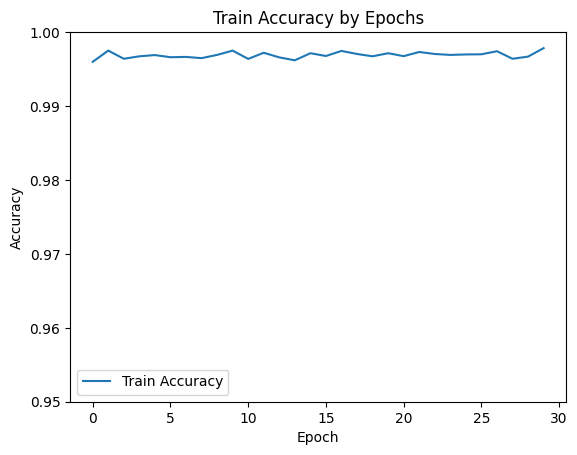

In [48]:
# Plotting train and validation accuracy
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train Accuracy by Epochs')
plt.ylim(0.95,1.0)
plt.legend()
plt.show()

1/1 [==============================] - 0s 17ms/step


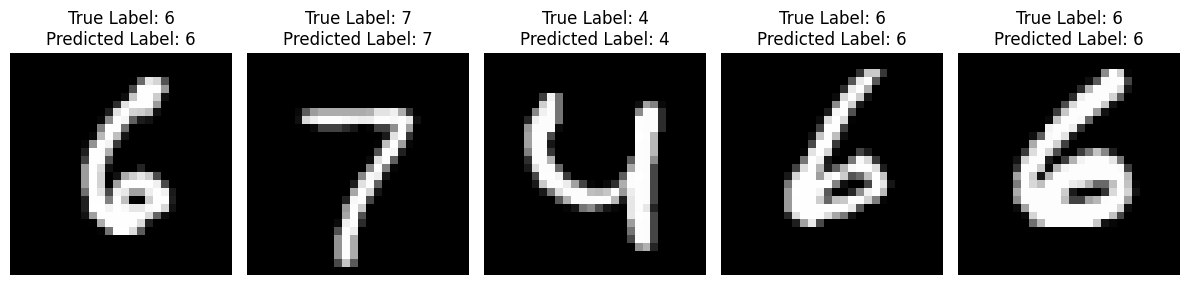

In [49]:
# Select random indices for testing
random_indices = np.random.choice(len(test_X), 5, replace=False)

# Get the random images and their labels
random_images = test_X[random_indices]
random_labels = test_y[random_indices]

# Get predictions for the random images
predictions = loaded_mod.predict(random_images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the random images along with their true and predicted labels
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(random_images[i].reshape(28, 28), cmap='gray')
    true_label = np.argmax(random_labels[i])
    predicted_label = predicted_labels[i]
    plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()



# Misclassified Images

375/375 [==============================] - 1s 2ms/step


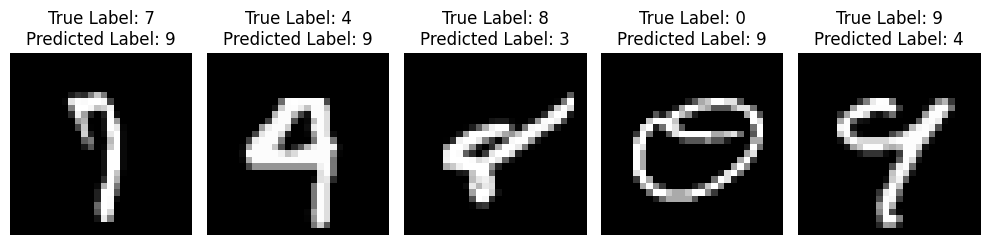

In [70]:
predictions1 = loaded_mod.predict(test_X)
predicted_labels1 = np.argmax(predictions1, axis=1)

# Convert one-hot encoded test labels to integer labels
true_labels1 = np.argmax(test_y, axis=1)

# Find misclassified indices
misclassified_indices1 = np.where(predicted_labels1 != true_labels1)[0]

# Plot misclassified images in a grid
num_rows = 1  # Number of rows in the grid
num_cols = 5  # Number of columns in the grid
num_images_to_plot = num_rows * num_cols

plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_indices1[:num_images_to_plot]):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(test_X[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {true_labels1[idx]}\nPredicted Label: {predicted_labels1[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

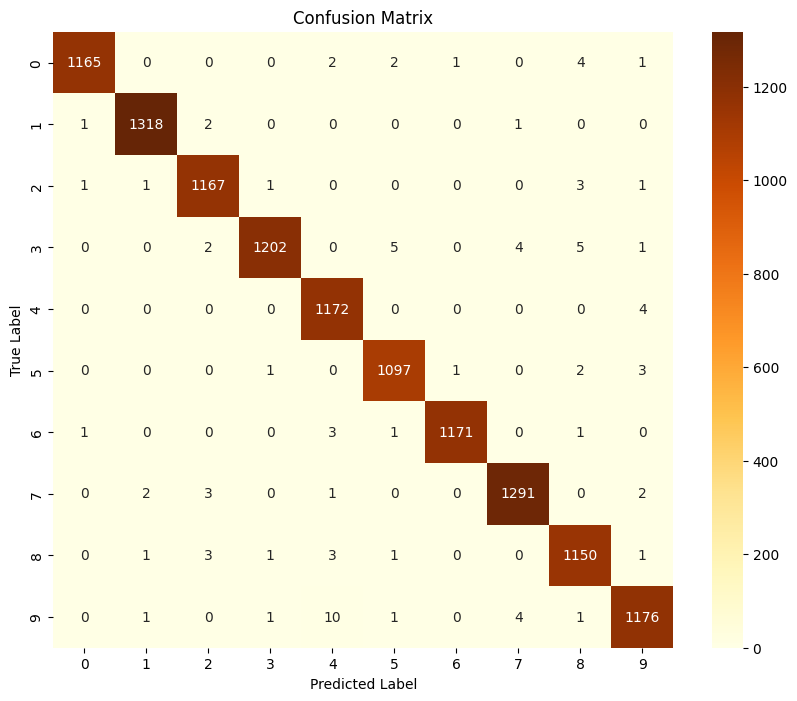

In [51]:
# Obtain the confusion matrix based on true and predicted labels
conf_matrix = confusion_matrix(true_labels1, predicted_labels1)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Transformers**

In [54]:
# Define ClassToken layer for creating a class token
class ClassToken(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()

    def build(self, input_shape):
        # Initialize weights for the class token
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(1, 1, input_shape[-1]), dtype=tf.float32),
            trainable=True
        )

    def call(self, inputs):
        # Get batch size and hidden dimension
        batch_size = tf.shape(inputs)[0]
        hidden_dim = self.w.shape[-1]

        # Create class token with the same shape as the input
        cls = tf.broadcast_to(self.w, [batch_size, 1, hidden_dim])
        cls = tf.cast(cls, dtype=inputs.dtype)
        return cls

# Function to build the Vision Transformer (ViT) model
def build_ViT(n, m, block_size, hidden_dim, num_layers, num_heads, key_dim, mlp_dim, dropout_rate, num_classes):
    # Define model inputs
    inp = tf.keras.layers.Input(shape=(n*m, block_size))  # Input for image blocks
    inp2 = tf.keras.layers.Input(shape=(n*m))  # Input for positional embeddings

    # Project image blocks to the hidden dimension
    mid = tf.keras.layers.Dense(hidden_dim)(inp)

    # Embed positional information
    emb = tf.keras.layers.Embedding(input_dim=n*m, output_dim=hidden_dim)(inp2)

    # Add positional embeddings to image block features
    mid = mid + emb

    # Create and append class token to the beginning of all input vectors
    token = ClassToken()(mid)
    mid = tf.keras.layers.Concatenate(axis=1)([token, mid])

    # Transformer Encoder: Stacked multi-head self-attention and MLP blocks
    for _ in range(num_layers):
        # Layer normalization before self-attention
        ln = tf.keras.layers.LayerNormalization()(mid)

        # Multi-head self-attention
        mha = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim, value_dim=key_dim)(ln, ln, ln)

        # Add and layer normalization
        add = tf.keras.layers.Add()([mid, mha])
        ln = tf.keras.layers.LayerNormalization()(add)

        # MLP block with GELU activation
        den = tf.keras.layers.Dense(mlp_dim, activation='gelu')(ln)
        den = tf.keras.layers.Dropout(dropout_rate)(den)
        den = tf.keras.layers.Dense(hidden_dim)(den)
        den = tf.keras.layers.Dropout(dropout_rate)(den)

        # Add and layer normalization again
        mid = tf.keras.layers.Add()([den, add])

    # Layer normalization at the end of the stack
    ln = tf.keras.layers.LayerNormalization()(mid)

    # Extract class token for each image in batch
    fl = ln[:, 0, :]

    # Output layer for classification
    clas = tf.keras.layers.Dense(num_classes, activation='softmax')(fl)

    # Define and compile the model
    model = tf.keras.models.Model([inp, inp2], clas)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Define model parameters
n = 4  # Number of rows of blocks
m = 4  # Number of columns of blocks
block_size = 49  # Number of pixels (with RGB) in each block
hidden_dim = 170  # Dimensionality of hidden layers
num_layers = 4  # Number of transformer layers
num_heads = 10  # Number of attention heads
key_dim = hidden_dim // num_heads  # Key dimension for multi-head attention
mlp_dim = hidden_dim  # Dimensionality of the MLP
dropout_rate = 0.2  # Dropout rate
num_classes = 10  # Number of output classes

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape and preprocess input data
ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]

x_train_ravel = np.zeros((ndata_train, n*m, block_size))
for img in range(ndata_train):
    ind = 0
    for row in range(n):
        for col in range(m):
            x_train_ravel[img, ind, :] = x_train[img, (row*7):((row+1)*7), (col*7):((col+1)*7)].ravel()
            ind += 1

x_test_ravel = np.zeros((ndata_test, n*m, block_size))
for img in range(ndata_test):
    ind = 0
    for row in range(n):
        for col in range(m):
            x_test_ravel[img, ind, :] = x_test[img, (row*7):((row+1)*7), (col*7):((col+1)*7)].ravel()
            ind += 1

pos_feed_train = np.array([list(range(n*m))] * ndata_train)
pos_feed_test = np.array([list(range(n*m))] * ndata_test)


In [55]:
# Rebuild the model with modified hyperparameters
trans = build_ViT(n, m, block_size, hidden_dim, num_layers, num_heads, key_dim, mlp_dim, dropout_rate, num_classes)

# Training the model
history_trans = trans.fit([x_train_ravel, pos_feed_train], y_train, validation_data=([x_test_ravel, pos_feed_test], y_test), epochs=50, batch_size=120)

Epoch 1/50
500/500 [==============================] - 20s 18ms/step - loss: 0.4963 - accuracy: 0.8384 - val_loss: 0.1662 - val_accuracy: 0.9458
Epoch 2/50
500/500 [==============================] - 8s 16ms/step - loss: 0.1600 - accuracy: 0.9497 - val_loss: 0.1173 - val_accuracy: 0.9634
Epoch 3/50
500/500 [==============================] - 8s 16ms/step - loss: 0.1270 - accuracy: 0.9604 - val_loss: 0.0999 - val_accuracy: 0.9668
Epoch 4/50
500/500 [==============================] - 8s 16ms/step - loss: 0.1081 - accuracy: 0.9657 - val_loss: 0.0883 - val_accuracy: 0.9728
Epoch 5/50
500/500 [==============================] - 8s 16ms/step - loss: 0.0977 - accuracy: 0.9690 - val_loss: 0.0933 - val_accuracy: 0.9722
Epoch 6/50
500/500 [==============================] - 8s 16ms/step - loss: 0.0916 - accuracy: 0.9713 - val_loss: 0.0750 - val_accuracy: 0.9776
Epoch 7/50
500/500 [==============================] - 8s 16ms/step - loss: 0.0843 - accuracy: 0.9730 - val_loss: 0.0883 - val_accuracy: 0.973

In [56]:
# Evaluate the model on train and test sets
train_loss, train_accuracy = trans.evaluate([x_train_ravel, pos_feed_train], y_train, verbose=0)
test_loss, test_accuracy = trans.evaluate([x_test_ravel, pos_feed_test], y_test, verbose=0)

print(f'Train accuracy: {train_accuracy * 100:.2f}%')
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Train accuracy: 99.84%
Test accuracy: 98.61%


In [57]:
# Save the model as .h5 file
trans.save("/content/drive/MyDrive/Colab Notebooks/trans_model1.h5")
# Download the model file to your local machine
files.download("/content/drive/MyDrive/Colab Notebooks/trans_model1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

313/313 [==============================] - 3s 8ms/step


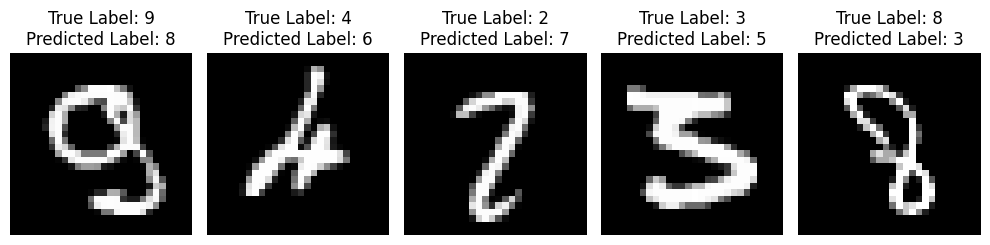

In [58]:
predictions = trans.predict([x_test_ravel, pos_feed_test])
predicted_labels = np.argmax(predictions, axis=1)

# Find misclassified indices
misclassified_indices = np.where(predicted_labels != y_test)[0]

# Plot misclassified images in a grid
num_rows = 1  # Number of rows in the grid
num_cols = 5  # Number of columns in the grid
num_images_to_plot = num_rows*num_cols

plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_indices[:num_images_to_plot]):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {y_test[idx]}\nPredicted Label: {predicted_labels[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# **Misclassified Images**

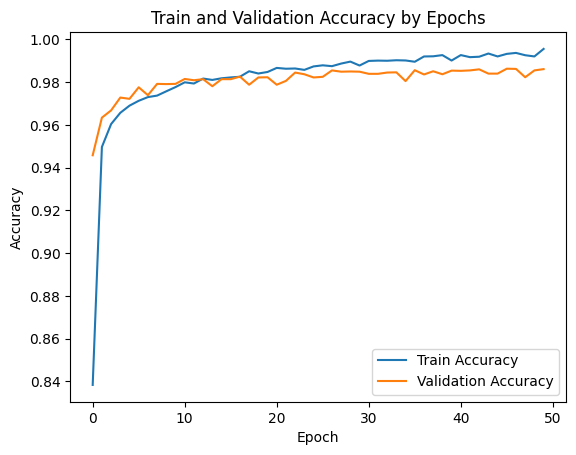

In [59]:
# Plotting train and validation accuracy
plt.plot(history_trans.history['accuracy'], label='Train Accuracy')
plt.plot(history_trans.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy by Epochs')
plt.legend()
plt.show()

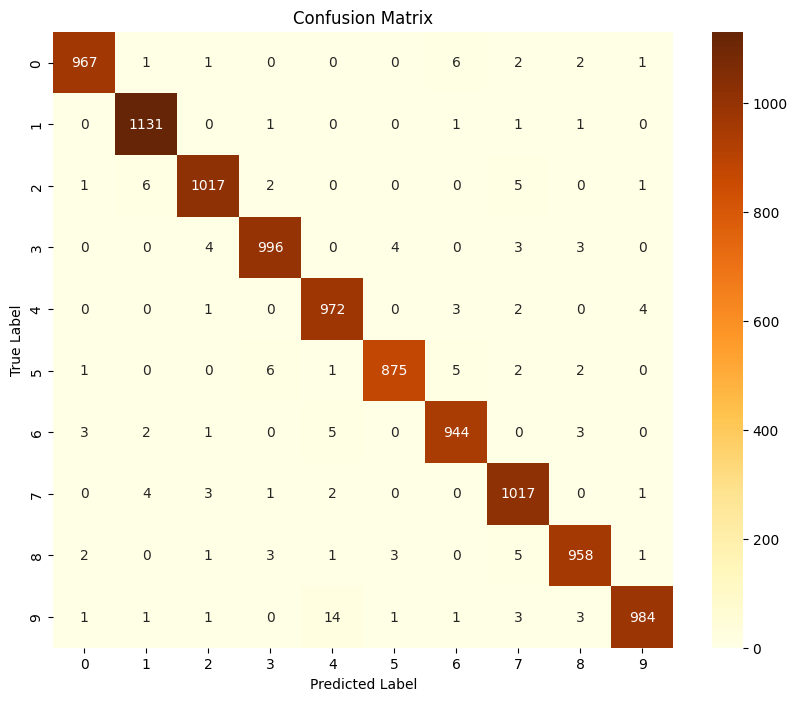

In [60]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Obtain the confusion matrix based on true and predicted labels
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

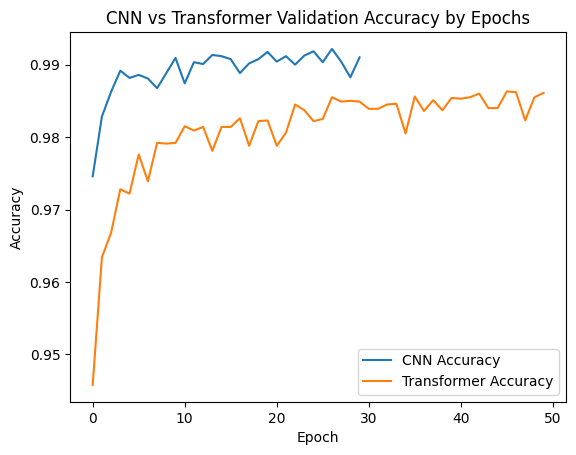

In [61]:
plt.plot(history.history['val_accuracy'], label='CNN Accuracy')
plt.plot(history_trans.history['val_accuracy'], label='Transformer Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN vs Transformer Validation Accuracy by Epochs')
plt.legend()
plt.show()

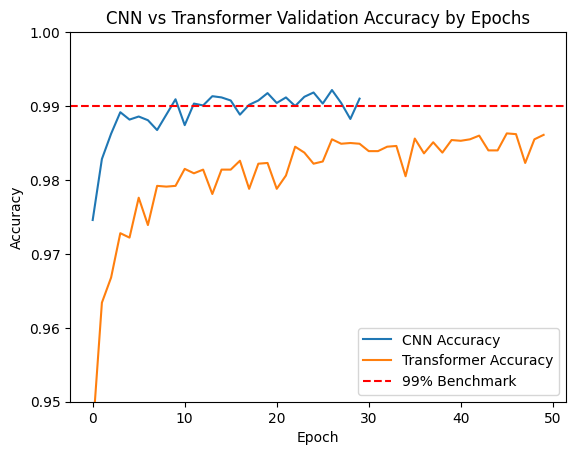

In [62]:
plt.plot(history.history['val_accuracy'], label='CNN Accuracy')
plt.plot(history_trans.history['val_accuracy'], label='Transformer Accuracy')
plt.axhline(y=0.99, color='r', linestyle='--', label='99% Benchmark')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN vs Transformer Validation Accuracy by Epochs')
plt.ylim(0.95,1)
plt.legend()
plt.show()

# **Retraining the transformer model on the entire training data**

In [66]:
# Load the saved model
custom_objects = {'ClassToken': ClassToken}
loaded_trans = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/trans_model1.h5",custom_objects=custom_objects)

In [67]:
history_trans_whole = loaded_trans.fit([x_train_ravel, pos_feed_train], y_train, epochs=50, batch_size=120)

Epoch 1/50
500/500 [==============================] - 16s 15ms/step - loss: 0.0191 - accuracy: 0.9936
Epoch 2/50
500/500 [==============================] - 7s 15ms/step - loss: 0.0185 - accuracy: 0.9937
Epoch 3/50
500/500 [==============================] - 7s 15ms/step - loss: 0.0183 - accuracy: 0.9938
Epoch 4/50
500/500 [==============================] - 8s 16ms/step - loss: 0.0164 - accuracy: 0.9943
Epoch 5/50
500/500 [==============================] - 8s 15ms/step - loss: 0.0167 - accuracy: 0.9942
Epoch 6/50
500/500 [==============================] - 8s 16ms/step - loss: 0.0200 - accuracy: 0.9932
Epoch 7/50
500/500 [==============================] - 7s 15ms/step - loss: 0.0189 - accuracy: 0.9933
Epoch 8/50
500/500 [==============================] - 7s 15ms/step - loss: 0.0169 - accuracy: 0.9942
Epoch 9/50
500/500 [==============================] - 8s 16ms/step - loss: 0.0169 - accuracy: 0.9941
Epoch 10/50
500/500 [==============================] - 7s 15ms/step - loss: 0.0121 - accur

In [71]:
test_loss,test_acc=loaded_trans.evaluate([x_test_ravel, pos_feed_test], y_test, verbose=0)

# **Test accuracy of the retrained transformer model**

In [72]:
print(f'Test accuracy: {test_acc * 100:.2f}%')

Test accuracy: 98.67%
